<div style="font: 24px Menlo; padding: 6px; color: #0000e0"><b>Introduction to Network Flow and SiLK</b></div>

# Notebook Objective

At the end of this module, you will have an understanding of:
- basic networking
- network flow
- the contents of a SiLK flow record
- flow generation and collection
- how to interpret SiLK flow records

## Legal

Copyright 2017 Carnegie Mellon University. All Rights Reserved.

This material is based upon work funded and supported by the Department of Defense under Contract No. FA8702-15-D-0002 with Carnegie Mellon University for the operation of the Software Engineering Institute, a federally funded research and development center.

The view, opinions, and/or findings contained in this material are those of the author(s) and should not be construed as an official Government position, policy, or decision, unless designated by other documentation.
References herein to any specific commercial product, process, or service by trade name, trade mark, manufacturer, or otherwise, does not necessarily constitute or imply its endorsement, recommendation, or favoring by Carnegie Mellon University or its Software Engineering Institute.

NO WARRANTY. THIS CARNEGIE MELLON UNIVERSITY AND SOFTWARE ENGINEERING INSTITUTE MATERIAL IS FURNISHED ON AN "AS-IS" BASIS. CARNEGIE MELLON UNIVERSITY MAKES NO WARRANTIES OF ANY KIND, EITHER EXPRESSED OR IMPLIED, AS TO ANY MATTER INCLUDING, BUT NOT LIMITED TO, WARRANTY OF FITNESS FOR PURPOSE OR MERCHANTABILITY, EXCLUSIVITY, OR RESULTS OBTAINED FROM USE OF THE MATERIAL. CARNEGIE MELLON UNIVERSITY DOES NOT MAKE ANY WARRANTY OF ANY KIND WITH RESPECT TO FREEDOM FROM PATENT, TRADEMARK, OR COPYRIGHT INFRINGEMENT.

[DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see Copyright notice for non-US Government use and distribution.

Internal use:\* Permission to reproduce this material and to prepare derivative works from this material for internal use is granted, provided the copyright and “No Warranty” statements are included with all reproductions and derivative works.

External use:\* This material may be reproduced in its entirety, without modification, and freely distributed in written or electronic form without requesting formal permission. Permission is required for any other external and/or commercial use. Requests for permission should be directed to the Software Engineering Institute at permission@sei.cmu.edu.

\* These restrictions do not apply to U.S. government entities.
Carnegie Mellon® is registered in the U.S. Patent and Trademark Office by Carnegie Mellon University.

DM17-0973


## Some Basics
You can navigate through this training using the arrow keys, or by scrolling your browser.  Input cells (prefixed with `In []:` can be executed using any of the following mechanisms:

* Using the ⌃↩ (Control-Enter) hotkey
* Clicking on the ▶︎❘ icon in the toolbar above
* Selecting `Run cells` from the `Cell` menu in the menu bar at the top of this page

The cells in this notebook have been locked. Typically, you can make changes to notebooks by selecting any input cell and clicking Enter to switch to edit mode.  Escape exits back to command mode.  A list of other hotkeys can be accessed by typing `H` from command mode.


<div class="girk" style="font: 18px Times">
**Exercise** Run the command in the cell below by clicking on the cell and hitting ⌃↩ (Control-Enter).</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
ls -l /data/bluered/silk.conf

We can see the contents of the `silk.conf` file  in the `/data` directory by using the Unix command `cat`.

<div class="girk" style="font: 18px Times">
**Exercise** Run the command in the cell below.</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
cat /data/bluered/silk.conf

# What is Network Flow?

NetFlow™ is a traffic-summarizing format that was first implemented by Cisco Systems® primarily for accounting purposes. Network flow data (or network flow) is a generalization of NetFlow.

Network Flow data is a log of all network activity; not a recording of all packets.  It is a record of metadata from related packets, similar to a phone bill.
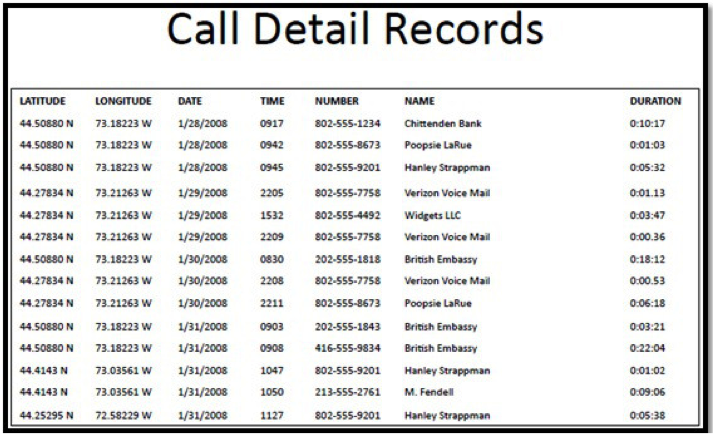

The content of messages is not recorded.  This allows for:
- much, much more compact data
    - longer retention
    - less processing
- increased privacy
- less impact from encryption

## Network Flow Basics

Understanding Network flow requires a basic understanding of how networking works.  

### Network Packets

At a very high level, network packets are like envelopes within envelopes (also known as [encapsulation](https://en.wikipedia.org/wiki/Encapsulation_%28networking%29)).  The innermost envelope contains the actual message (or payload).  The image below shows an example of encapsulation of a TCP/IP packet on an Ethernet link.
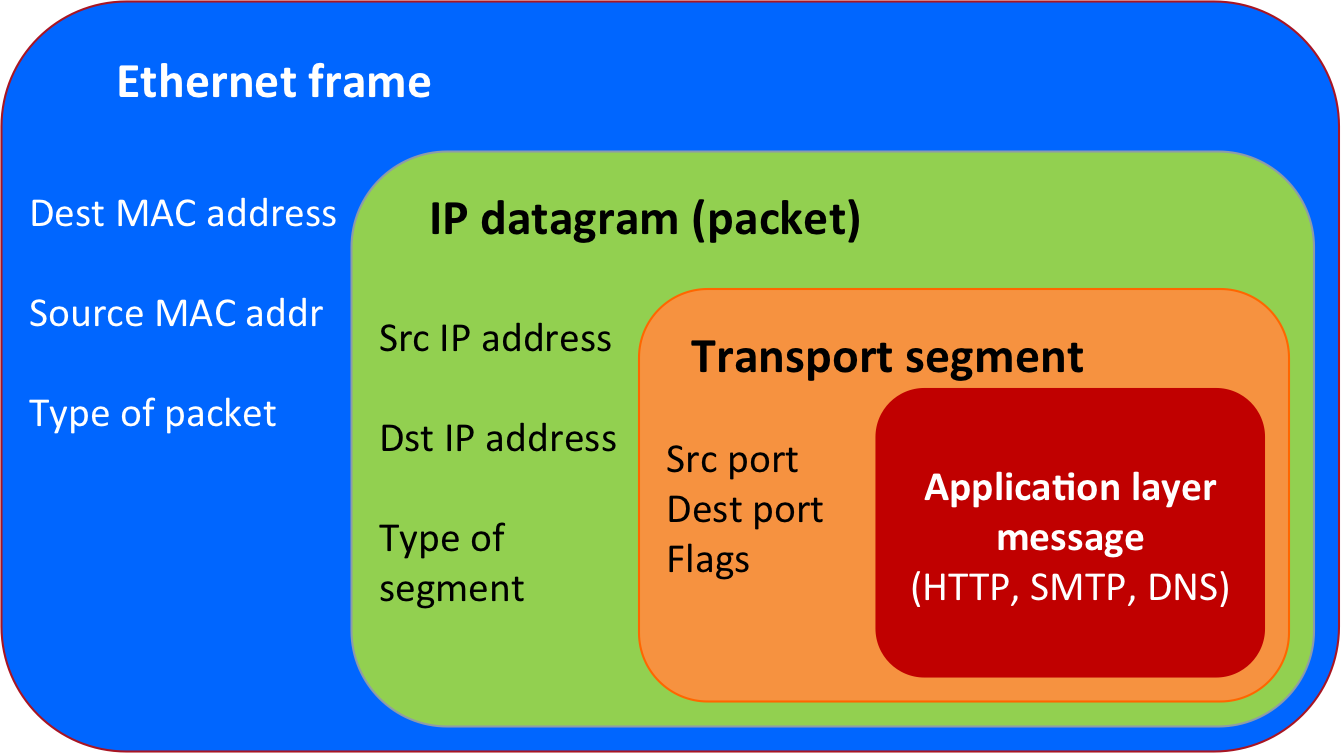

### Network Connections

A TCP/IP socket is a logical entity representing the resources at one end of a TCP/IP connection.  
A TCP/IP socket is identified by three items:
1. An IP address which identifies a physical interface on a particular host
2. A Layer 4 (Transport layer) protocol, e.g., TCP or UDP
3. A port number, which together with the layer 4 protocol identifies a particular process or service within the host

The L4 protocol must be the same for both sockets in the connection.  The IP address may be the same or different between the two sockets.  The triple (IP address, L4 protocol, port) must be different between the two sockets in the connection.  One socket may participate in multiple connections, particularly on servers; however, the 5-tuple (source IP, destination IP, source port, destination port, L4 protocol) cannot be the same for two concurrent connections.  It doesn’t make a lot of sense to talk about connections in a connectionless protocol like UDP, so we prefer to call the related traffic flowing in both directions bidirectional flows.
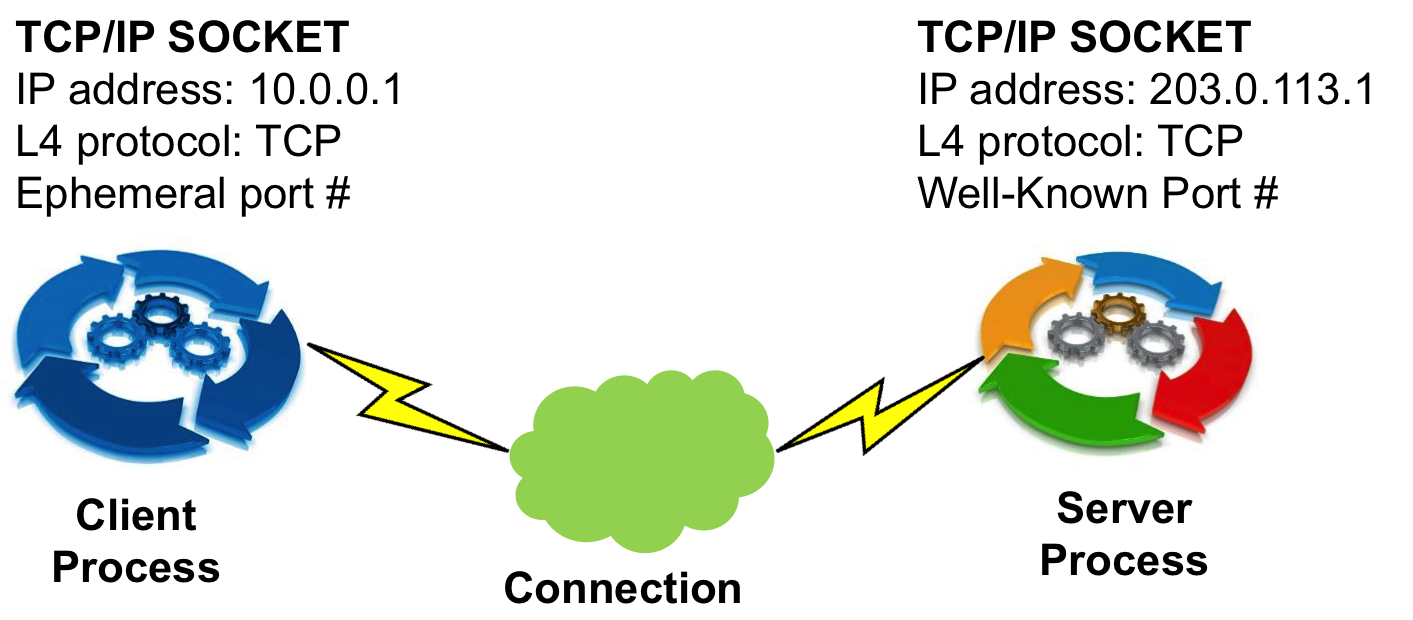

### Directional Flows

Network flows can represent network traffic in either bidirectional or unidirectional flows.  A bidirectional flow is the summarization of the complete two-way conversation into one flow record.  A unidirectional flow is the summarization of the two-way conversation into two different flow records, one for each direction.  For example:
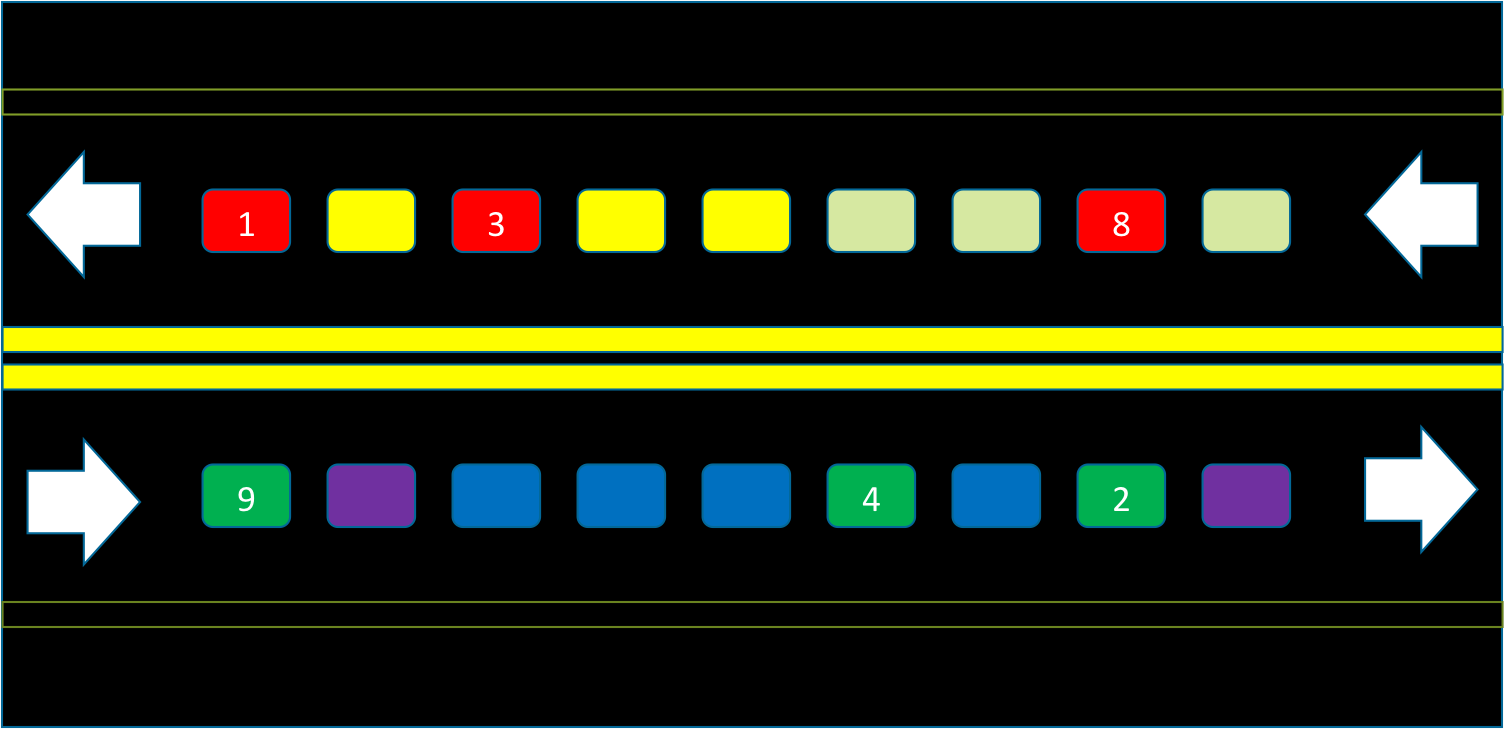

Each rounded rectangle in the image represents a packet.  The picture itself represents packets flowing in both directions on a network cable. Same-colored packets belong to the same flow. There are never packets in the same flow travelling in opposite directions. The red and green flows appear to be related in time; they might constitute a single TCP connection (session).


**The SiLK tool suite makes use of unidirectional flows.**

#### Fields in a SiLK Flow Record

The complete list of available fields are:

| Field Number | Field Name | Description |
|:------------: |:----------- | :----------- |
| 1 | sIP | Source IP address for flow |
| 2 | dIP | Destination IP address for flow |
| 3 | sPort | Source port for flow (or 0) |
| 4 | dPort | Destination port for flow (or 0) |
| 5 | protocol | Transport-layer protocol number for flow |
| 6 | packets, pkts | Number of packets in flow |
| 7 | bytes | Number of bytes in flow (starting with IP header) |
| 8 | flags | Cumulative TCP flag fields of flow (or blank) |
| 9 | sTime | Start date and time of flow |
| 10 | duration | Duration of flow |
| 11 | eTime | End date and time of flow |
| 12 | sensor | Sensor that collected the flow |
| 13 | in | Ingress interface or VLAN on sensor (usually zero) |
| 14 | out | Egress interface or VLAN on sensor (usually zero) |
| 15 | nhIP | Next-hop IP address (usually zero) |
| 16 | sType | Type of source IP address (pmap required) |
| 17 | dType | Type of destination IP address (pmap required) |
| 18 | scc | Source country code (pmap required) |
| 19 | dcc | Destination country code (pmap required) |
| 20 | class | Class of sensor that collected flow |
| 21 | type | Type of flow for this sensor class |
| -- | iType | ICMP type for ICMP and ICMPv6 flows (SiLK V3.8.1+) |
| -- | iCode | ICMP code for ICMP and ICMPv6 flows (SiLK V3.8.1+) |
| 25 | icmpTypeCode | Both ICMP type and code values (before SiLK V3.8.1) |
| 26 | initialFlags | TCP flags in initial packet |
| 27 | sessionFlags | TCP flags in remaining packets |
| 28 | attributes | Termination conditions |
| 29 | application | Standard port for application that produced the flow |

The main fields are the:
- source IP address
- destination IP
- source port number
- destination port number
- transport protocol  

This set of numbers is commonly referred to as the “*5-tuple*”, and uniquely defines one side of a socket connection at a particular period of time.

For ICMP traffic, the destination port encodes the ICMP type and code values, which are each 8 bits in length, by packing them into the 16-bit destination port field.

### Representations of Network Data

One method for representing network data is to make use of a Sequence Diagram.
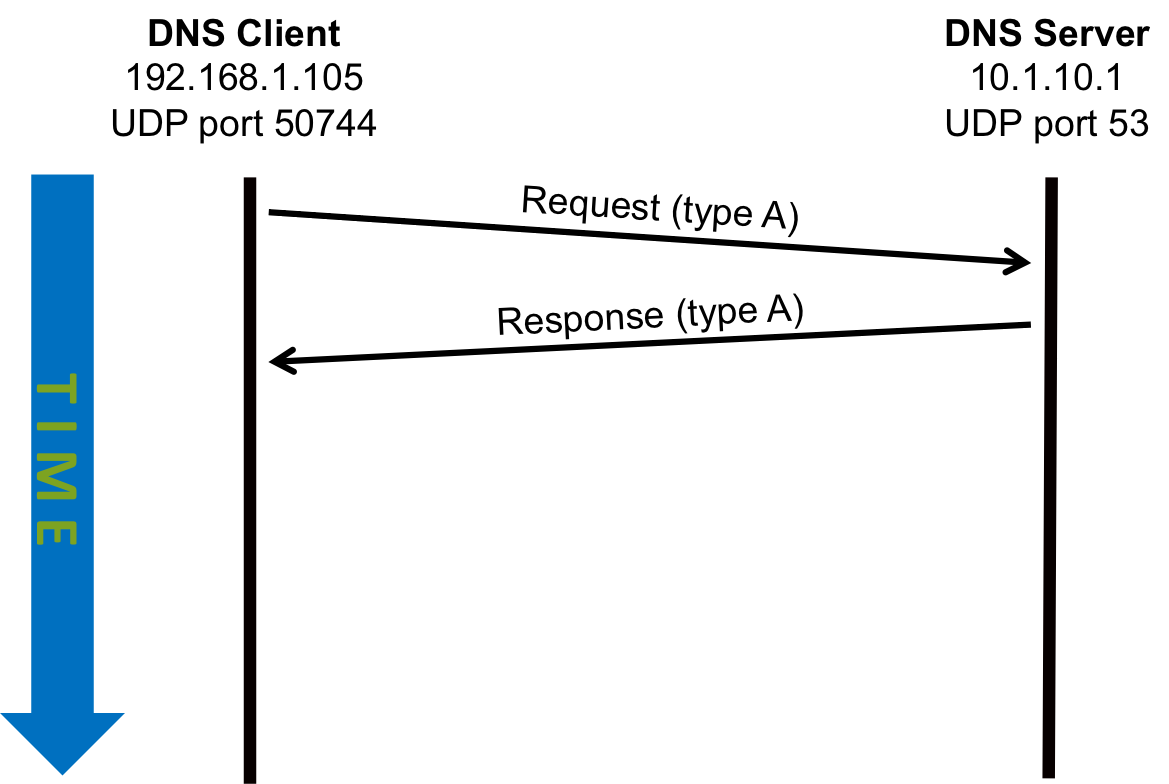
The vertical bar on the left represents the DNS Client. The bar on the right represents the server.  The black arrows represent packets; they slant downward to show that they take time to travel.

<div class="mark">
**Question:** How many unidirectional flows do you see?</div><i class="fa fa-lightbulb-o "></i>

> <div class="girk" style="font: 18px Times">**2**, one from DNS Client to DNS Server and one from DNS Server to DNS Client.</div>

Another representation of network data can come from a packet sniffer's display.
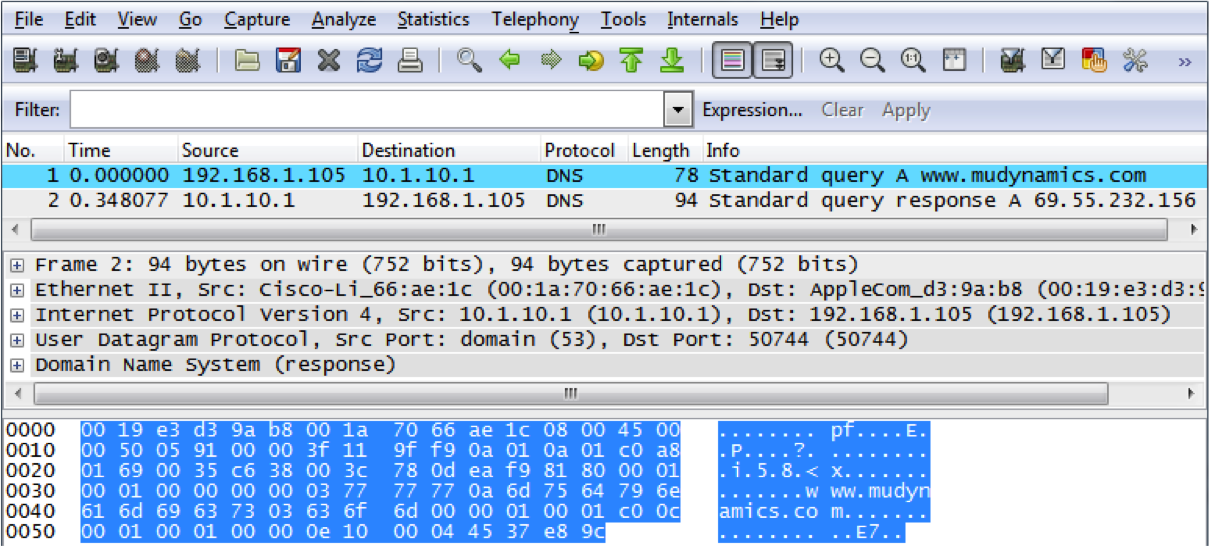

<div class="mark">
**Question** Looking at the packet-list pane (under the toolbars) what is the same about the IP addresses of the two packets?  What is different?</div><i class="fa fa-lightbulb-o "></i>

> <div class="girk" style="font: 18px Times">The same IP addresses are used in both packets, however, they have alternated between Source and Destination.</div>

One final method for representing network data can come from the SiLK tool `rwcut`.
```bash
          sIP|          dIP|sPort|dPort|pro|packets|bytes|sensor|type|
192.168.1.105|    10.1.10.1|50744|   53| 17|      1|   64|    S1| out|
    10.1.10.1|192.168.1.105|   53|50744| 17|      1|   80|    S1|  in|
```
Each row represents one flow record.

## What is SiLK
The System for Internet-Level Knowledge (or SiLK) tool suite is a [publicly available](http://tools.netsa.cert.org/silk/) set of netflow tools that supports both aquisition and analysis of network flow data.  This suite is a highly scalable flow-data capture and analysis system developed by the Network Situational Awareness group (NetSA) at Carnegie Mellon University’s Software Engineering Institute (SEI). SiLK tools provide network security analysts with the means to understand, query, and summarize both recent and historical traffic data represented as network flow records. The SiLK tools provide network security analysts with a relatively complete high-level view of traffic across an enterprise network, subject to placement of sensors.
### What SiLK Does
The SiLK analysis tool suite allows for insight into various aspects of network behavior.  It can be used in the following types of analysis:
- Investigative analysis
- Descriptive analysis
- Directed analysis
- Exploratory analysis
- Predictive analysis

Common questions addressed via flow analyses include (but aren’t limited to)
- What is on my network?
- What happened before the event?
- Where are policy violations occurring?
- Which are the most popular web servers?
- How much volume would be reduced by applying a blacklist?
- Do my users browse to known infected web servers?
- Do I have a spammer on my network?
- When did my web server stop responding to queries?
- Is my organization routing undesired traffic?
- Who uses my public Domain Name System (DNS) server?

### Flow Generation and Collection
Every day, SiLK may collect many gigabytes of network flow data from across the enterprise network. Given both the volume and complexity of these data, it is critical to understand how these data are recorded. This section reviews the collection process and shows how data are stored as network flow records. A network flow record is generated by sensors throughout the enterprise network. The majority of these may be routers, although specialized sensors, such as [yaf](http://tools.netsa.cert.org/yaf/), also can be used to avoid artifacts in a router’s implementation of network flow or to use non-device-specific network flow data formats, such as IPFIX (see http://tools.ietf.org/html/rfc7011 for definitions and the IPFIX protocol description and http://www.iana.org/assignments/ipfix for descriptions of the IPFIX information elements), or for more control over network flow record generation.

A sensor generates network flow records by grouping together packets that are closely related in time and have a common flow label. “Closely related” is defined by the sensor and typically set to around 30 seconds.

Network flow is an approximation of traffic, not a natural law. Routers and other sensors make a guess when they decide which packets belong to a flow. These guesses are not perfect; there are several well-known phenomena in which a long-lived session will be split into multiple flow records: 
1. *Active timeout* is the most common cause of a split network flow. Network flow records are purged from the sensor’s memory and restarted after a configurable period of activity. As a result, all network flow records have an upper limit on their duration that depends on the local configuration. A typical value would be around 30 minutes.
2. *Cache flush* is a common cause of split network flows for router-collected network flow records. Network flows take up memory resources in the router, and the router regularly purges this cache of network flows for housekeeping purposes. The cache flush takes place approximately every 30 minutes as well. A plot of network flows over a long period of time shows many network flows terminate at regular 30-minute intervals, which is a result of the cache flush.
3. *Router exhaustion* also causes split network flows for router-collected flows. The router has limited processing and memory resources devoted to network flow. During periods of stress, the flow cache will fill and empty more often due to the number of network flows collected by the router. 

Use of specialized flow sensors can avoid or minimize cache-flush and router-exhaustion issues. All of these cases involve network flows that are long enough to be split. In our experience, the majority of network flows collected at the enterprise network border are small and short-lived.
#### Where Network Flow Data are Collected
While complex networks may segregate flow records based on where the records were collected (e.g., the network border, major points within the border, at other points), the generic implementation of the SiLK collection system defaults to collection only at the network border, as shown in the figure below. Further segregation of the data is done by type of traffic.
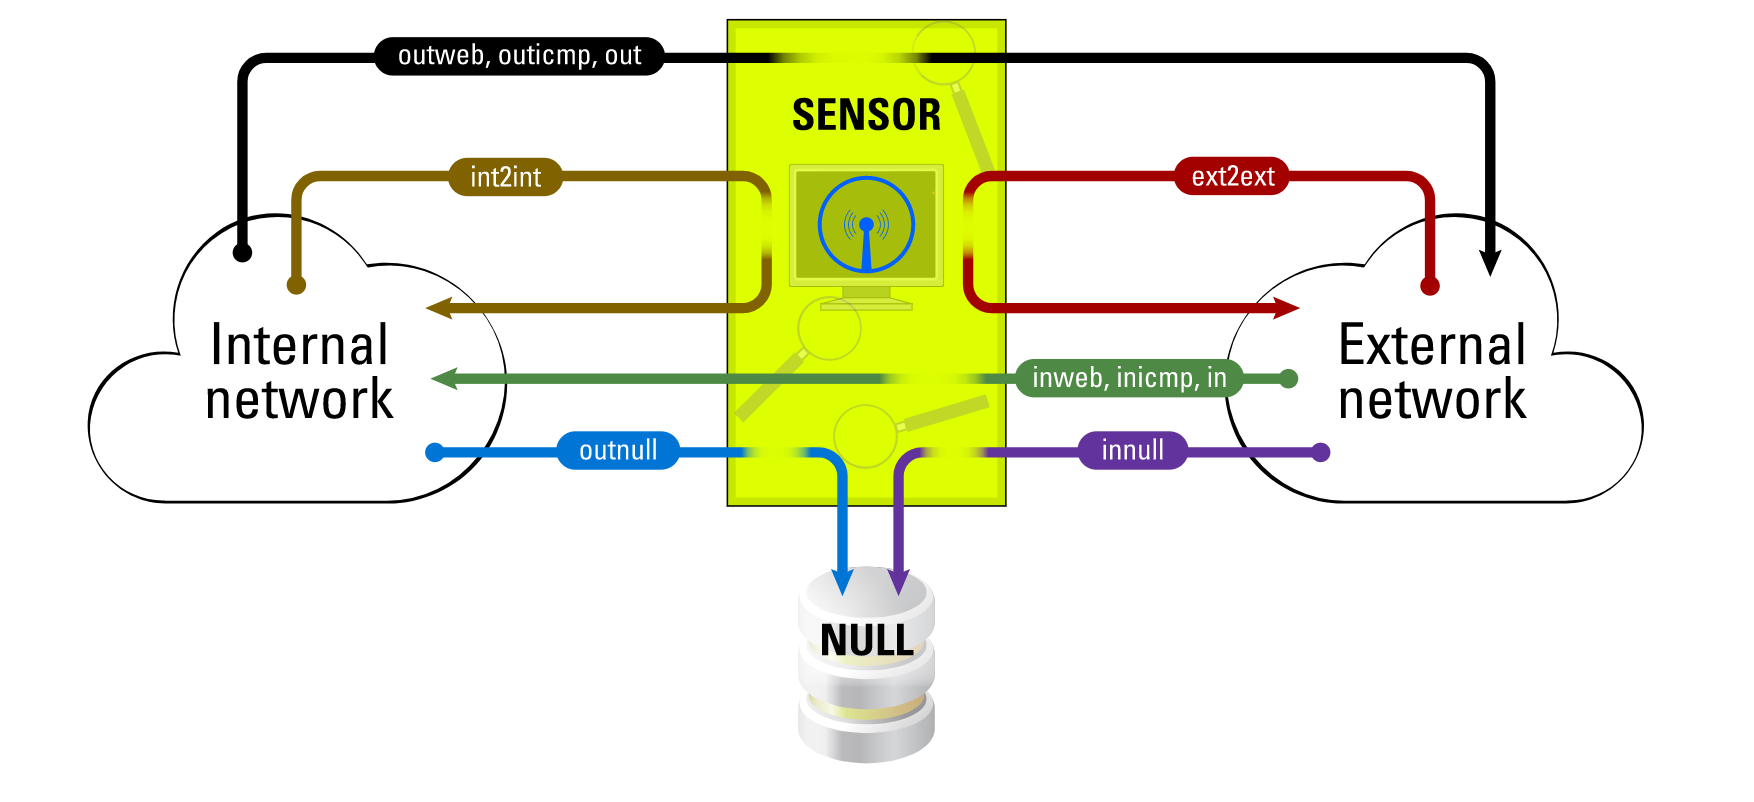

#### Types of Enterprise Network Traffic
In SiLK, the term type mostly refers to the direction of traffic, rather than a content-based characteristic. In the generic implementation, there are six basic types and five additional types.

| Type | Description |
|:------------ |:----------- |
| **inweb**, outweb | Inbound/outbound TCP ports 80, 443, 8080 |
| innull, outnull | Inbound/outbound filtered traffic |
| **inicmp**, outicmp | Inbound/outbound IP protocol 1 |
| **in**, out | Inbound/outbound not in above categories |
| int2int, ext2ext | Internal to internal, external to external |
| other | Source not internal or external, or destination not internal, external, or null |

The types shown in bold are often default types, and can be confirmed with: `rwsiteinfo --fields=default-type`.

With a router, interfaces and/or VLANs are defined as internal, external, or other.  The direction of a flow is determined by the ingress interface/VLAN and the egress interface/VLAN. For a non-router flow generator, address blocks are defined as internal, external, or other.  The direction of a flow is determined by the ingress address block and the egress address block.

#### Sensor Placement
Awareness of sensor placement and configuration matters in flow analysis.  For example, in the sequence diagram below, the sensor will see 2 flows.  One for the request from DNS Client to the Local Server, and one for the response from Local Server to DNS Client.
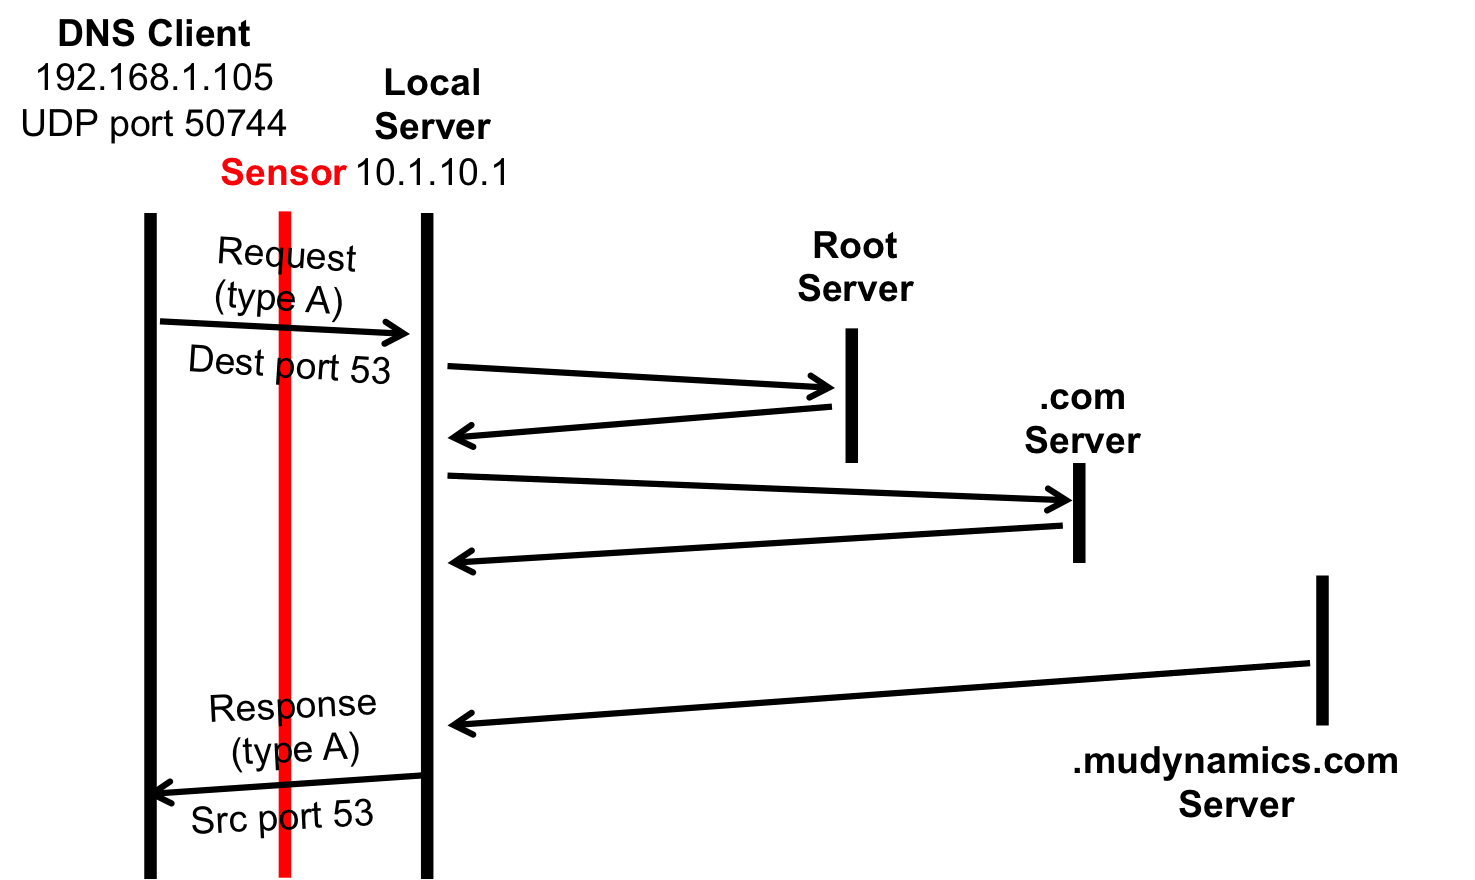

<div class="mark">**Question** How many flows are in the updated diagram below?</div>

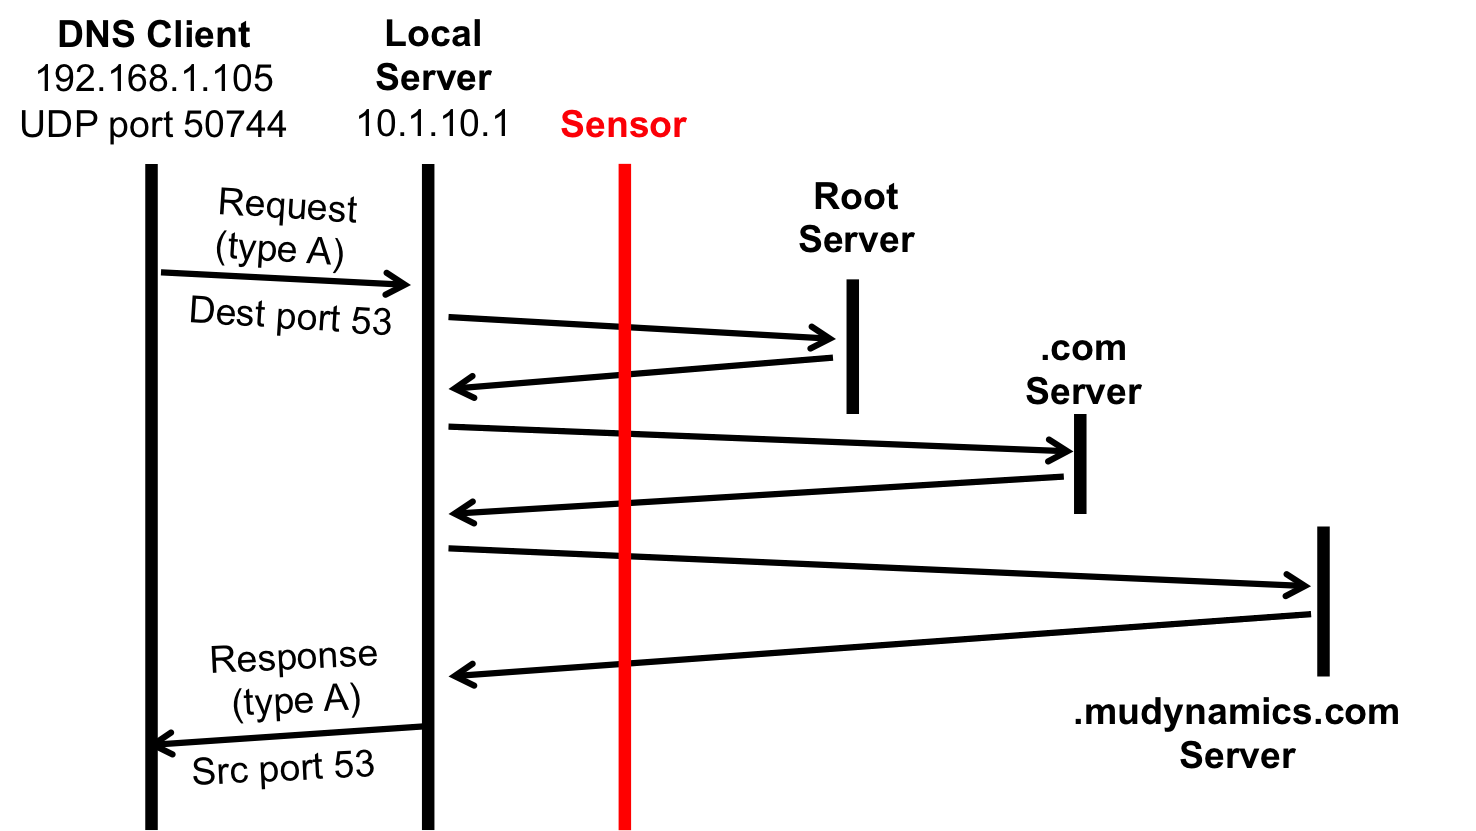

> <div class="girk" style="font: 18px Times">**6**. One for the request from Local Server to Root Server. One for the response from Root Server to Local Server. One for the request from Local Server to .com Server.  One for the response from .com server to Local Server.  One for the request from Local Server to .mudynamics.com Server. One for the response from .mudynamics.com Server to Local Server.</div>

We can make use of the SiLK tool `rwsiteinfo` to produce a list of sensors in use for a specific installation, reflecting its configuration.

<div class="girk" style="font: 18px Times">
**Exercise** Run the commands in the cells below to see information about the training repository.</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
rwsiteinfo --fields=sensor,describe-sensor,repo-start-date,repo-end-date

In [ ]:
rwsiteinfo --fields=id-sensor,sensor,class:list

#### The Collection System and Data Management

To understand how to use SiLK for analysis, it helps to have some understanding of how data are collected, stored, and managed. Understanding how the data are partitioned can produce faster queries by reducing the amount of data searched. In addition, by understanding how the sensors complement each other, it is possible to gather traffic data even when a specific sensor has failed. 

Data collection starts when a flow record is generated by one of the sensors: either a router or a dedicated sensor. Flow records are generated when a packet relevant to the flow is seen, but a flow is not reported until it is complete or flushed from the cache. Consequently, a flow can be seen some time (depending on timeout configuration and on sensor caching, among other factors) after the start time of the first packet in the flow. 

Packed flows are stored into files indicated by class, type, sensor, and the hour in which the flow started. So for traffic coming from the ISP through or past the sensor named SEN1 on March 1, 2014 for flows starting between 3:00 and 3:59:59.999 p.m. Coordinated Universal Time (UTC) a sample path to the file could be `/data/SEN1/in/2014/03/01/in-SEN1_20140301.15`.

The data repository is accessed through the use of SiLK tools, particularly the `rwfilter` command-line application.  An analyst using `rwfilter` should specify the type of data to be viewed by using a set of five selection parameters. This notebook discusses selection parameters in more depth later. The image below shows a typical repository layout on the filesystem.
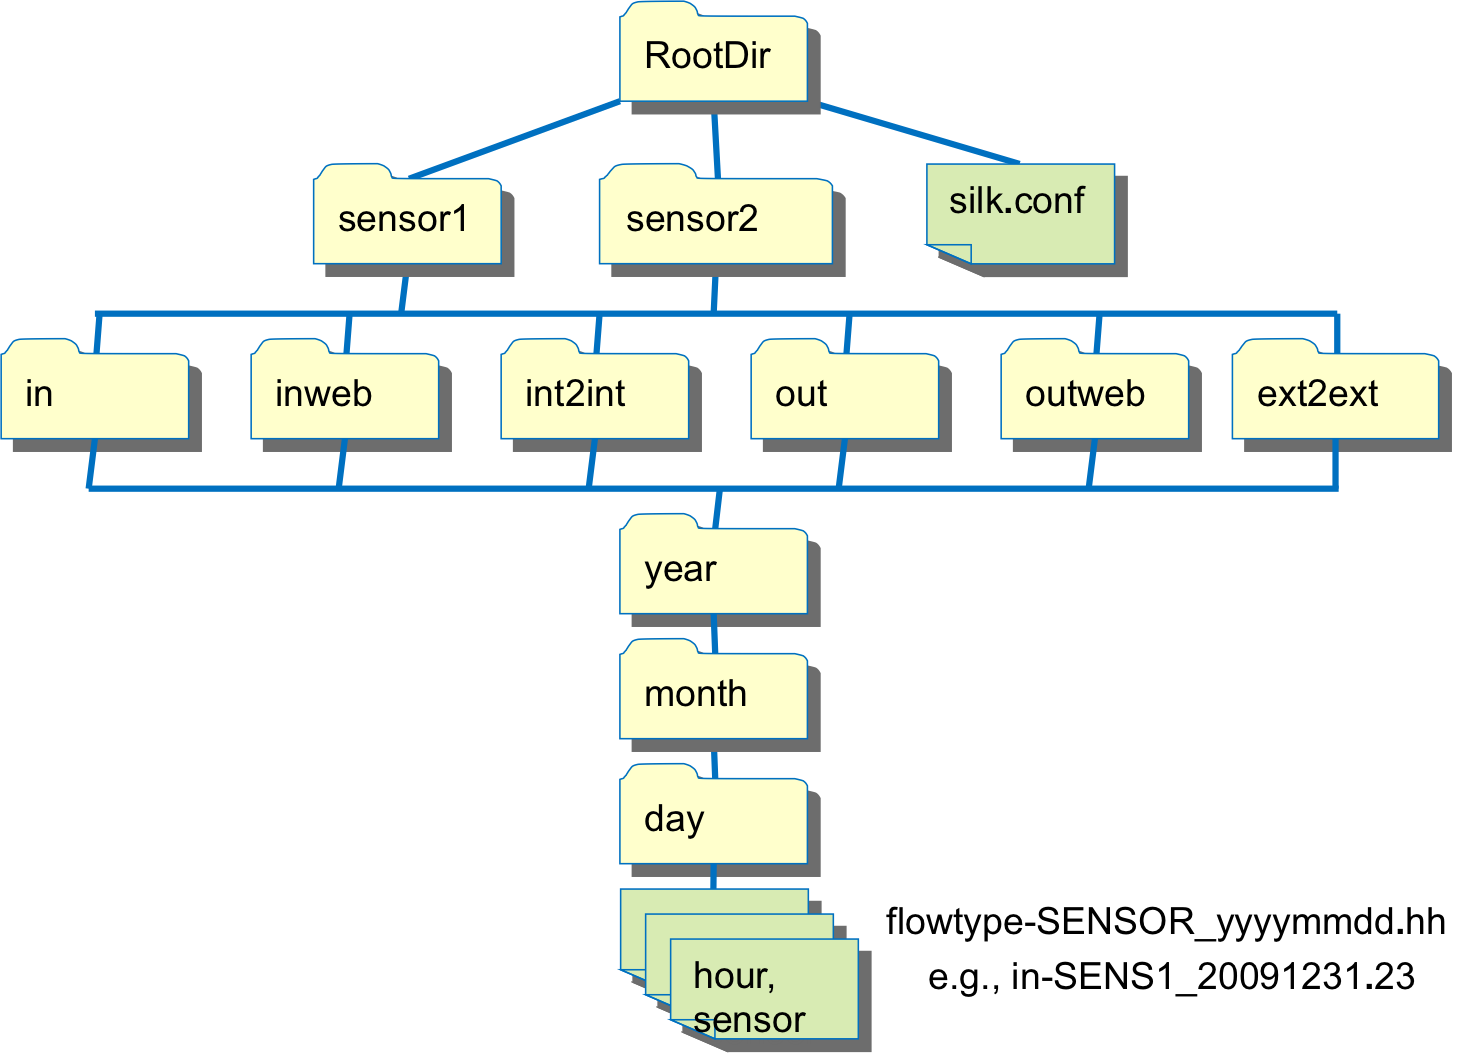

Repository data are stored in hourly divisions, which are referred to in the form yyyy/mm/ddThh in UTC. Thus, the hour beginning 11 a.m. on February 23, 2014 in Pittsburgh would be referred to as 2014/2/23T16 when compensating for the difference between UTC and Eastern Standard Time (EST)—five hours. In general, data for a particular hour starts being recorded at that hour and will continue recording until some time after the end of the hour. Under ideal conditions, the last long-lived flows will be written to the file soon after they time out (e.g., if the active timeout period is 30 minutes, the last flows will be written out 30 minutes plus propagation time after the end of the hour). Under adverse network conditions, however, flows could accumulate on the sensor until they can be delivered.  Under normal conditions, the file for 2005/3/7 20:00 UTC would have data starting at 3 p.m. in Pittsburgh and finish being updated after 4:30 p.m. in Pittsburgh.

Data are divided by time and sensor. The class of a sensor is often associated with the sensor’s role as a router: access layer, distribution layer, core (backbone) layer, or border (edge) router. The classes of sensors that are available are determined by the installation. By default, there is only one class —“all”— but based on analytical interest, other classes may be configured as needed. As shown in the repository layout image above, each class of sensor has several types of traffic associated with it: typically in, inweb, out, and outweb. To find the classes and types supported by the installation, run `rwsiteinfo --fields=class,type,mark-defaults`. Data types are used for two reasons: 
1. they group data together into common directions and 
2. they split off major query classes. 

Web traffic generally constitutes about 50% of the flows in any direction; by splitting the web traffic into a separate type, we reduce query time. Most queries to repository data access one *class* of data at a time but access multiple *types* simultaneously.

## Interpreting Flow Records

A flow file is a series of flow records.  A flow record holds all the data SiLK retains from the collection process: the flow label fields, start time, number of packets, duration of flow, and so on.

The following is a set of example SiLK flow records:

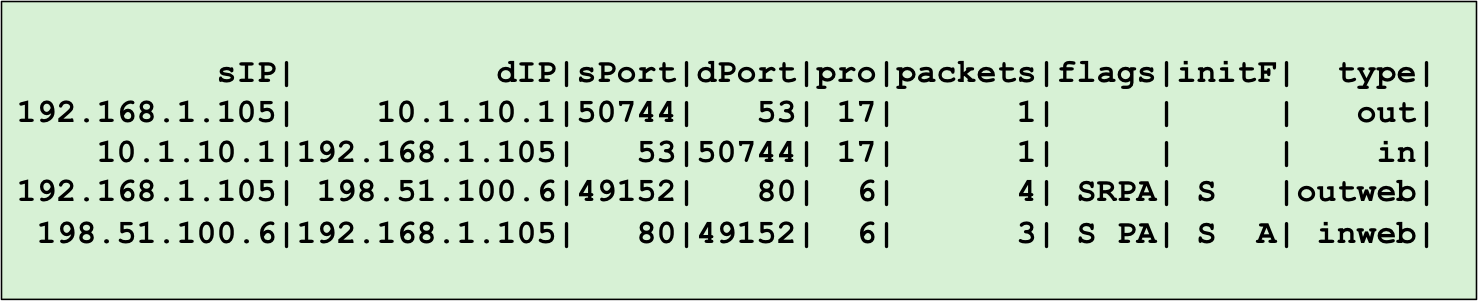

<div class="mark">
**Question:** How many flows (uniflows) do you see?</div><i class="fa fa-lightbulb-o "></i>

There are 4 uniflows, one for each unique five tuple.

<div class="mark">
**Question:** How many conversations (sessions, biflows) do you see?</div><i class="fa fa-lightbulb-o "></i>

There are 2 biflows, one for each five tuple and its opposite.

<div class="mark">
**Question:** What is the nature of the activity in the first session?</div><i class="fa fa-lightbulb-o "></i>

DNS request from 192.168.1.105 to 10.1.10.1 and DNS response from 10.1.10.1 to 192.168.1.105.

<div class="mark">
**Question:** What is the nature of the activity in the second session?  Are the port numbers the only giveaway? </div><i class="fa fa-lightbulb-o "></i>

Web request from 192.168.1.105 to 198.51.100.6 and web response from 198.51.100.6 to 192.168.1.105. The protocol, packet count, flags, and type all provide additional clues.

The following image is the representation of the example SiLK flow records above in a sequence diagram.
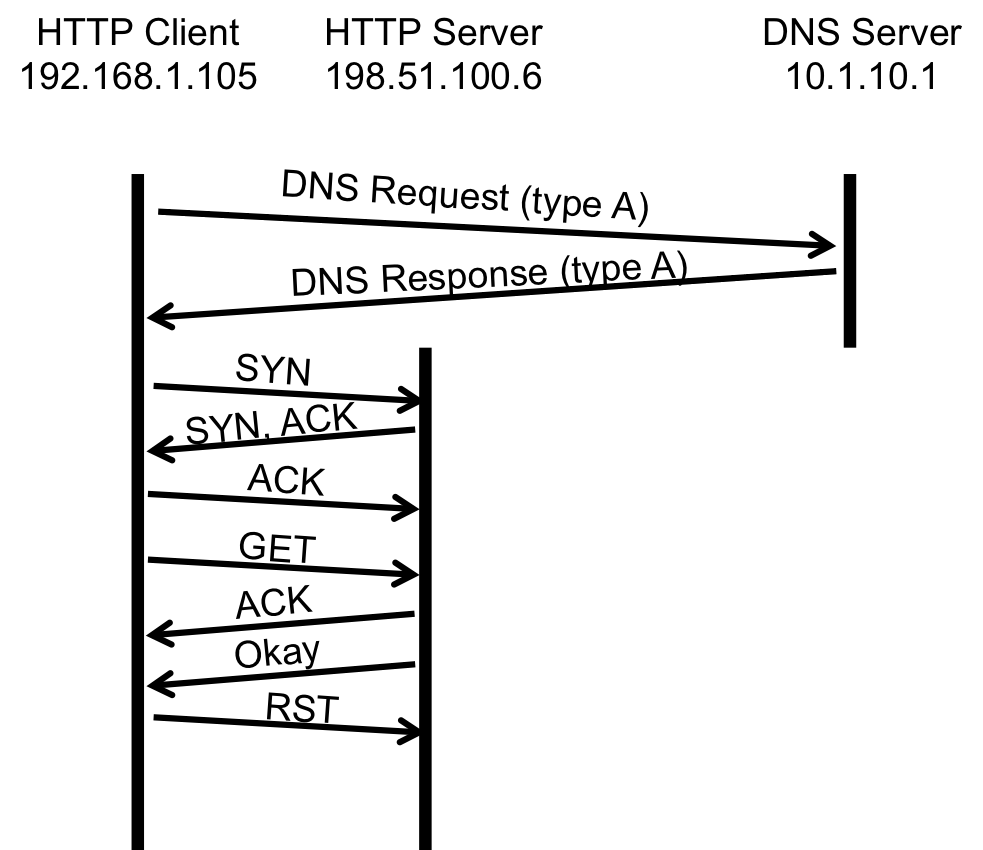

Take a look at some additional example SiLK flow records:
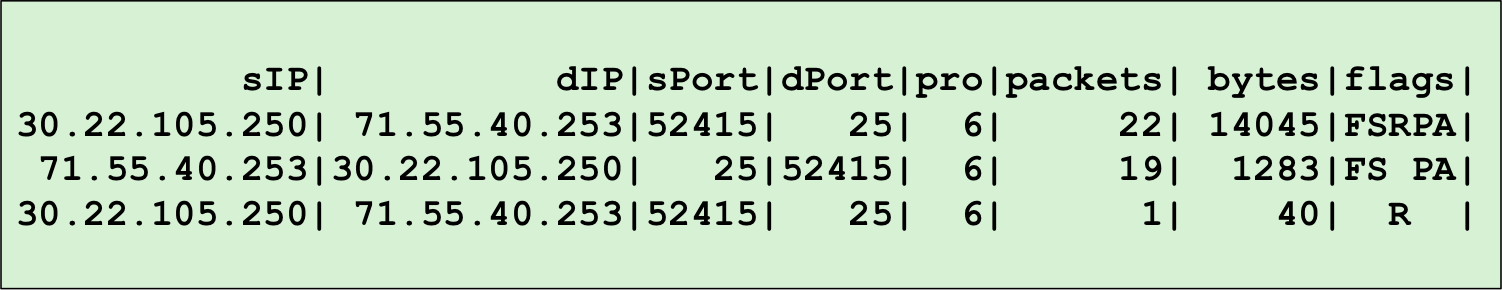

<div class="mark">
**Question:** What is shown in this example? Can you tell which IP address appears to be the client and which is the server?</div><i class="fa fa-lightbulb-o "></i>

We see communications on port 25, which means this is probably email (SMTP) traffic. IP address 71.55.40.253 appears to be the server since it is hosting the SMTP port 25 service. Since IP address 30.22.105.250 is using a high numbered ephemeral port, it is the SMTP client.

Taking a look at the byte volume, there’s a big difference between the client and the server. The client sent about ten times as much data as the server, a total of about 14k bytes. That makes sense if we consider 30.22.105.250 to be sending a message to 71.55.40.253

What about the RST packets? Well, they’re sent from the client to the server, and it seems like they’re sent after the FIN connection teardown has completed. Although we can’t tell exactly what is going on here, it’s not uncommon to see spurious RST packets at the end of a TCP session, particularly with high-volume clients and servers.

<div class="mark">What do you notice in the following set of flow records? Does it look like normal traffic to you?</div><i class="fa fa-lightbulb-o "></i>

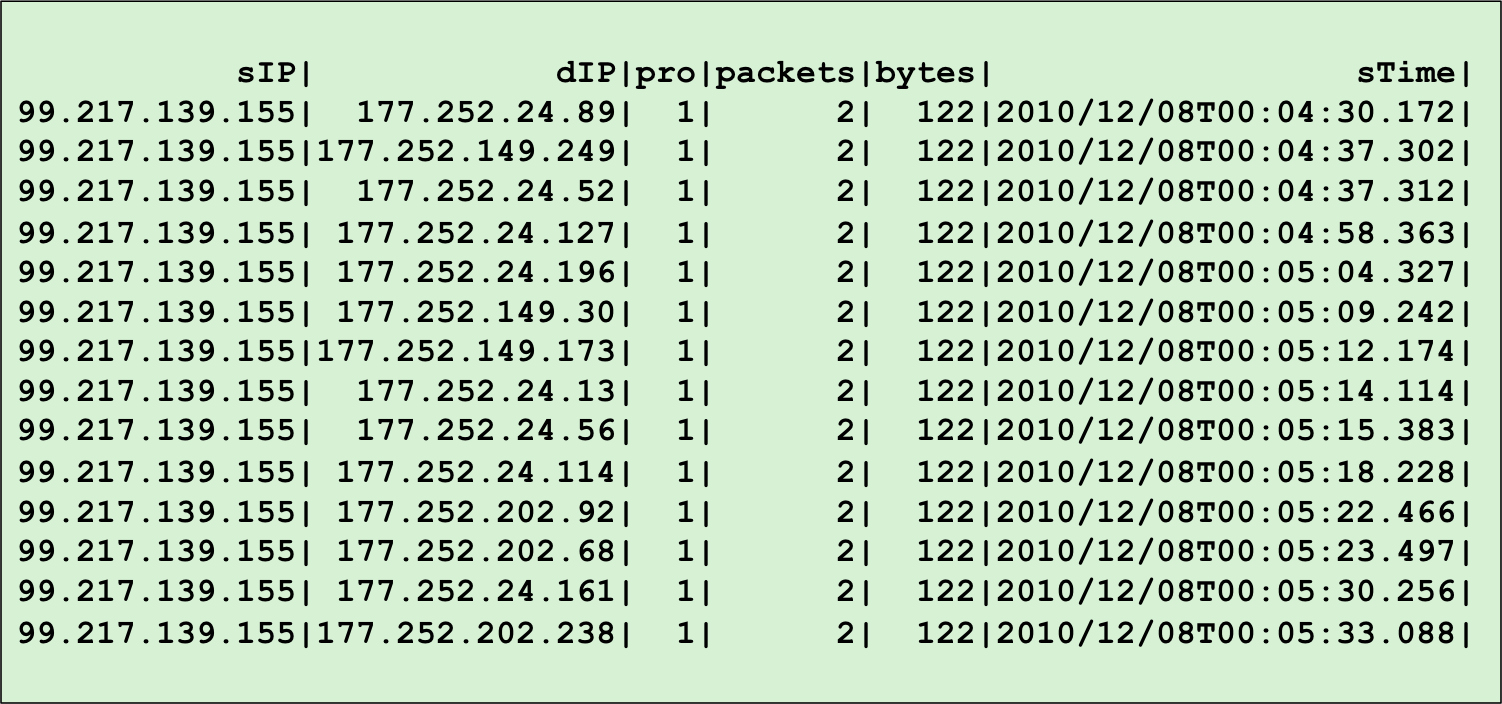

Taking a quick look at the IP addresses, we see that one address, the source address, remains the same, while the destination address changes. In fact, you’ll notice that while the destination address changes, it only changes within a given range of addresses; the first two octets of the destination address remain the same while the second to octets change. It looks like the IP address 99.217.139.155 is scanning the 177.252 network. This is a scan or sweep.

But can we tell anything else about the scan?  Let’s take a closer look.
The protocol is always 1. That means this is an ICMP scan. Each scan target receives two packets for a total of 122 bytes. That means each packet is probably half that, or 61 bytes. Each packet probably has a 40-byte IP header and four bytes of ICMP header, leaving room for 17 bytes of data. Finally, look at the packet timing. We see about two to four packets per second. Is this a fast scan, or maybe even a denial-of-service attack? Not at that rate. Considering everything we’ve observed, this just looks like routine scan activity.

<div class="mark">Take a look at our final example.  What is going on here?</div><i class="fa fa-lightbulb-o "></i>

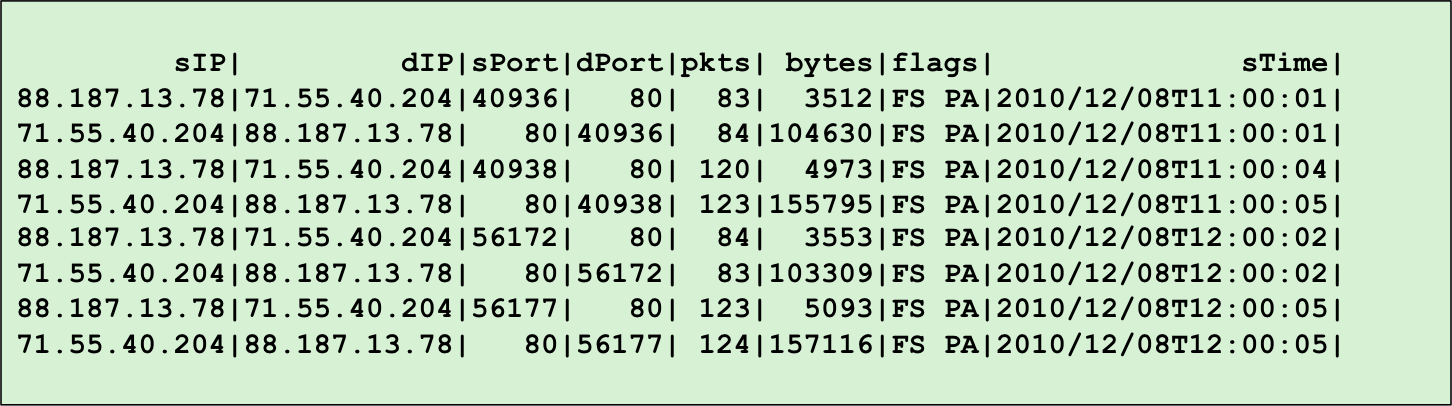

Our first clue in unraveling this traffic is to look at the ports. You should quickly recognize port 80, the port used for normal web or HTTP traffic. Every flow record on the list uses this port, so it’s probably all HTTP traffic.

Looking at the first record, since 80—the service port—is the destination port, that means that the destination IP address is the server.  So we know that 71.55.40.204 is service HTTP traffic.

Similarly, looking at the high port, the ephemeral port, we identify the client as 88.187.13.78.  Also notice that the ephemeral port increases with new connections, which is to be expected.

We see three separate connections from the client to the web server all within 20 seconds, and then three later connections.  Each connection has normal flags—SYN, ACK and FIN—and a reasonable number of packets.  All in all, the first set of six flows—three TCP connections—looks like a standard web page loading and then pulling down some included reference data like images or style sheets.

Finally, take a look at all the flows together.  Everything’s pretty similar, except for the timing.  There’s repetitive behavior here, but it’s pretty slow—there’s 3 seconds between the 2nd and 3rd packets and between the 6th and 7th, but almost an hour between the 4th and 5th—and the timing is not exact.  This does not look like system behavior; instead, it looks like normal user interaction with a web site:  click, read, click, read, click.

Overall, this looks like normal web browsing activity.

# Additional Information

This completes the Introduction to Network Flow and SiLK notebook.  If you are interested in learning more, the main folder contains an Introduction to SiLK Analysis notebook for a more hands on learning approach.  Other learning resources are:
* [Using SiLK for Network Traffic Analysis: Analyst’s Handbook for SiLK Versions 3.8.3 and Later](http://tools.netsa.cert.org/silk/analysis-handbook.pdf)
    * The Analyst’s Handbook is useful for beginning, intermediate and advanced analysts using the SiLK tool suite for network flow analysis. It includes reviews of networking and Unix commands relevant for anyone using SiLK for network analysis. It provides readable descriptions of the SiLK tools and how they are used. The numerous examples will often form the basis of an analytic script you need. Once you know where “the good stuff” is located, you will refer to it often.
* [Network Profiling Using Flow](https://resources.sei.cmu.edu/library/asset-view.cfm?assetid=28115)
    * A step-by-step guide for profiling and discovering public-facing assets on a network using netflow data.
* [SiLK Tool Suite Quick Reference](http://tools.netsa.cert.org/silk/SiLK-QuickRef-2016-06.pdf)
    * A quick reference guide to the core analysis tools. Useful to print out and keep around.
* [SiLK Tooltips Wiki](https://tools.netsa.cert.org/confluence/display/tt/Tooltips)
    * Tips and tricks to use with the SiLK analysis suite. These documents point out features and uses of the tools that very helpful and not immediately obvious.
* [SiLK Reference Data](http://tools.netsa.cert.org/silk/referencedata.html)
    * 2 Sets of publically available SiLK Reference Data
* The [SEI YouTube Channel](https://www.youtube.com/playlist?list=PLSNlEg26NNpyBCKGeWaYWyuZPGfkaPWAM) has several SiLK related videos available.
